In [1]:
#Import module
import nltk
import string
import warnings
import pandas as pd
import seaborn as sns
import matplotlib as plt
import random


In [2]:

pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline



In [3]:
import pandas as pd
import re

# Read the Excel file into a DataFrame
data = pd.read_excel(r'C:\Users\user\Downloads\Tweets.xlsx')
data.head()





,Tweet,Label
0,Why are #Connecticut Senators @ChrisMurphyCT and @SenBlumenthal silent? \nWhy does @StateDept @SecBlinken pay Palestinians aid to murder Americans?\n\n#Israel #Jewish #Terrorism #Jihad #Iran #Elan...,1
1,Do not miss this new course from @richard_landes #jihad #Israel #terrorism,1
2,"ðŸ˜¢\nWATCH: Family members eulogize Hillel and Yigal Yaniv, two Israeli brothers killed in a terrorist attack.\n#Israel \n#WarOnTerror \n#Islam \n#Jihad \n#Palestinians \n#Zionism \n#Antisemitism...",1
3,"Indian army encountered the terrorist #AqibMustaq who murdered #SanjaySharma. In his head IT WAS #JIHAD.\nEntitled murderers should face consequences here on earth so they know ""until the fictiona...",1
4,2 Islamic State Commanders Killed by Taliban Forces in Afghanistan\n#Afghanistan #Taliban #IslamicState #Terrorists \nhttps://t.co/a90FKl3HvX,1


In [4]:
import re
# removing the pattern
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

In [6]:
import numpy as np
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['Tweet'],"@[\w]*") 
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
data.head()


,Tweet,Label,tidy_tweet
0,Why are #Connecticut Senators @ChrisMurphyCT and @SenBlumenthal silent? \nWhy does @StateDept @SecBlinken pay Palestinians aid to murder Americans?\n\n#Israel #Jewish #Terrorism #Jihad #Iran #Elan...,1,Why are #Connecticut Senators and silent? \nWhy does pay Palestinians aid to murder Americans?\n\n#Israel #Jewish #Terrorism #Jihad #Iran #ElanGaneles\n
1,Do not miss this new course from @richard_landes #jihad #Israel #terrorism,1,Do not miss this new course from #jihad #Israel #terrorism
2,"ðŸ˜¢\nWATCH: Family members eulogize Hillel and Yigal Yaniv, two Israeli brothers killed in a terrorist attack.\n#Israel \n#WarOnTerror \n#Islam \n#Jihad \n#Palestinians \n#Zionism \n#Antisemitism...",1,"ðŸ˜¢\nWATCH: Family members eulogize Hillel and Yigal Yaniv, two Israeli brothers killed in a terrorist attack.\n#Israel \n#WarOnTerror \n#Islam \n#Jihad \n#Palestinians \n#Zionism \n#Antisemitism..."
3,"Indian army encountered the terrorist #AqibMustaq who murdered #SanjaySharma. In his head IT WAS #JIHAD.\nEntitled murderers should face consequences here on earth so they know ""until the fictiona...",1,"Indian army encountered the terrorist #AqibMustaq who murdered #SanjaySharma. In his head IT WAS #JIHAD.\nEntitled murderers should face consequences here on earth so they know ""until the fictiona..."
4,2 Islamic State Commanders Killed by Taliban Forces in Afghanistan\n#Afghanistan #Taliban #IslamicState #Terrorists \nhttps://t.co/a90FKl3HvX,1,2 Islamic State Commanders Killed by Taliban Forces in Afghanistan\n#Afghanistan #Taliban #IslamicState #Terrorists \nhttps://t.co/a90FKl3HvX


In [7]:
#Removing twitter unwanted symbols 
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 3
data.head()


,Tweet,Label,tidy_tweet
0,Why are #Connecticut Senators @ChrisMurphyCT and @SenBlumenthal silent? \nWhy does @StateDept @SecBlinken pay Palestinians aid to murder Americans?\n\n#Israel #Jewish #Terrorism #Jihad #Iran #Elan...,1,#Connecticut Senators silent? does Palestinians murder Americans? #Israel #Jewish #Terrorism #Jihad #Iran #ElanGaneles
1,Do not miss this new course from @richard_landes #jihad #Israel #terrorism,1,miss this course from #jihad #Israel #terrorism
2,"ðŸ˜¢\nWATCH: Family members eulogize Hillel and Yigal Yaniv, two Israeli brothers killed in a terrorist attack.\n#Israel \n#WarOnTerror \n#Islam \n#Jihad \n#Palestinians \n#Zionism \n#Antisemitism...",1,"ðŸ˜¢ WATCH: Family members eulogize Hillel Yigal Yaniv, Israeli brothers killed terrorist attack. #Israel #WarOnTerror #Islam #Jihad #Palestinians #Zionism #Antisemitism https://t.co/Cgrbgz2KgA"
3,"Indian army encountered the terrorist #AqibMustaq who murdered #SanjaySharma. In his head IT WAS #JIHAD.\nEntitled murderers should face consequences here on earth so they know ""until the fictiona...",1,"Indian army encountered terrorist #AqibMustaq murdered #SanjaySharma. head #JIHAD. Entitled murderers should face consequences here earth they know ""until fictional hereafter"" there only pain! Sam..."
4,2 Islamic State Commanders Killed by Taliban Forces in Afghanistan\n#Afghanistan #Taliban #IslamicState #Terrorists \nhttps://t.co/a90FKl3HvX,1,Islamic State Commanders Killed Taliban Forces Afghanistan #Afghanistan #Taliban #IslamicState #Terrorists https://t.co/a90FKl3HvX


In [8]:
#it will split all words by whitespace
tokenized_tweet = data['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()


0                                                                       [#Connecticut, Senators, silent?, does, Palestinians, murder, Americans?, #Israel, #Jewish, #Terrorism, #Jihad, #Iran, #ElanGaneles]
1                                                                                                                                                    [miss, this, course, from, #jihad, #Israel, #terrorism]
2    [ðŸ˜¢, WATCH:, Family, members, eulogize, Hillel, Yigal, Yaniv,, Israeli, brothers, killed, terrorist, attack., #Israel, #WarOnTerror, #Islam, #Jihad, #Palestinians, #Zionism, #Antisemitism, https...
3    [Indian, army, encountered, terrorist, #AqibMustaq, murdered, #SanjaySharma., head, #JIHAD., Entitled, murderers, should, face, consequences, here, earth, they, know, "until, fictional, hereafter"...
4                                                            [Islamic, State, Commanders, Killed, Taliban, Forces, Afghanistan, #Afghanistan, #Taliban, #IslamicState, #Terrorists, 

In [9]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in t
    


In [44]:
#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
data['tidy_tweet'] = tokenized_tweet

data.head()


,Tweet,Label,tidy_tweet
0,Why are #Connecticut Senators @ChrisMurphyCT and @SenBlumenthal silent? \nWhy does @StateDept @SecBlinken pay Palestinians aid to murder Americans?\n\n#Israel #Jewish #Terrorism #Jihad #Iran #Elan...,1,# c o n n e c t i c u t s e n a t s i l e n t ? d o e p a l e s t i n i a n m u r d e r ...
1,Do not miss this new course from @richard_landes #jihad #Israel #terrorism,1,m i s s t h i c o u r s f r o m # j i h a d # i s r a e l # t e r r o r
2,"ðŸ˜¢\nWATCH: Family members eulogize Hillel and Yigal Yaniv, two Israeli brothers killed in a terrorist attack.\n#Israel \n#WarOnTerror \n#Islam \n#Jihad \n#Palestinians \n#Zionism \n#Antisemitism...",1,ð ÿ ˜ ¢ w a t c h : f a m i l i m e m b e r e u l o g h i l l e l y i g a l y a n i ...
3,"Indian army encountered the terrorist #AqibMustaq who murdered #SanjaySharma. In his head IT WAS #JIHAD.\nEntitled murderers should face consequences here on earth so they know ""until the fictiona...",1,i n d i a n a r m i e n c o u n t t e r r o r i s t # a q i b m u s t a q m u r d e r ...
4,2 Islamic State Commanders Killed by Taliban Forces in Afghanistan\n#Afghanistan #Taliban #IslamicState #Terrorists \nhttps://t.co/a90FKl3HvX,1,i s l a m s t a t e c o m m a n d k i l l t a l i b a n f o r c a f g h a n i s t a n ...


In [11]:
#collect hashtags

def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [40]:
#extracting hashtags from positive tweets
ht_positive = hashtag_extract(data['tidy_tweet'][data['Label']==1])
#extracting hashtags from negative tweets
ht_negative=hashtag_extract(data['tidy_tweet'][data['Label']==0])
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])
# Convert the list to a pandas Series
ht_negative_series = pd.Series(ht_negative)


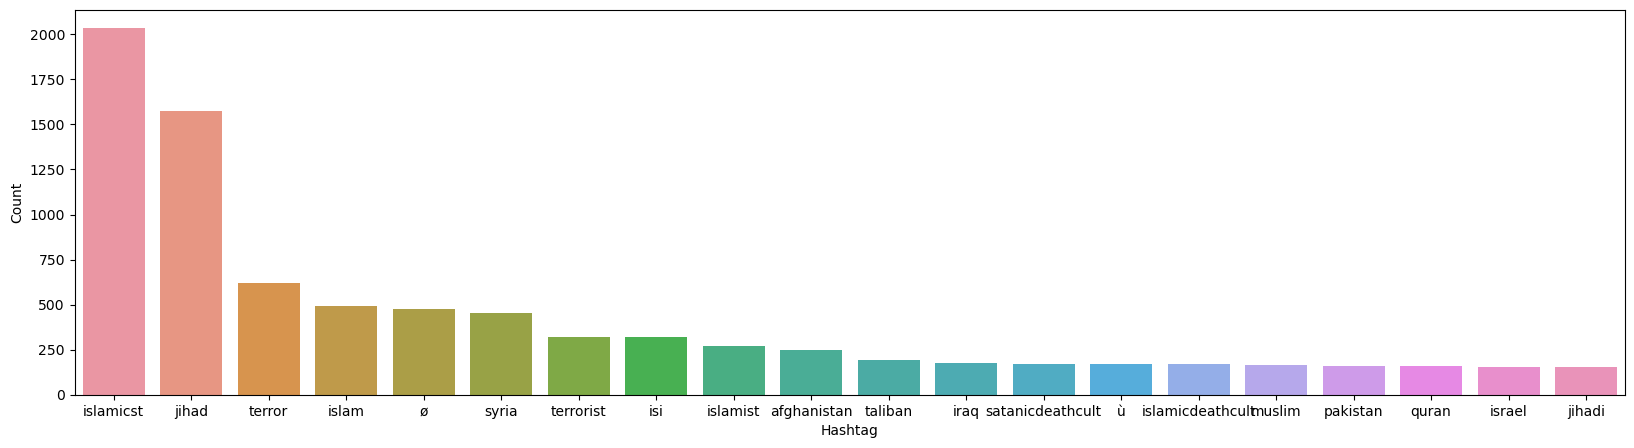

In [41]:
#positive tweets

positive_tweets = nltk.FreqDist(ht_positive)
df1 = pd.DataFrame({'Hashtag': list(positive_tweets.keys()),'Count':list(positive_tweets.values())})
import matplotlib.pyplot as plt

#selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=20)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

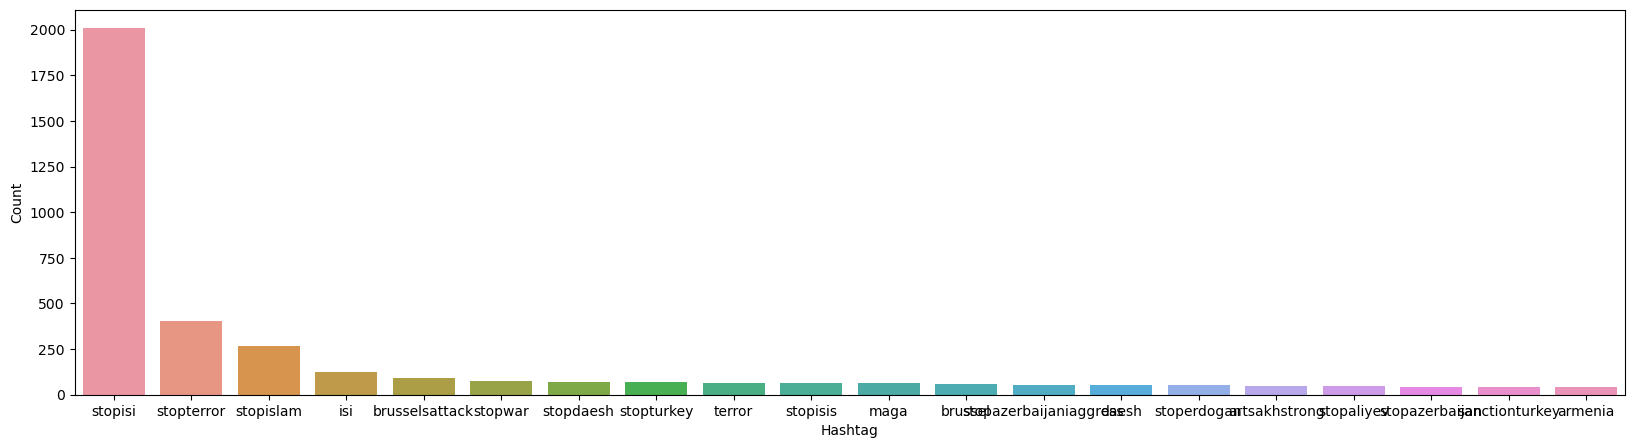

In [42]:
#negative tweets

negative_tweets = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(negative_tweets.keys()),'Count': list(negative_tweets.values())}) #count number of occurrence of particular word

#selecting top 20 frequent  hashtags

df2 = df2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()

In [20]:
#pip install gensim
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

In [21]:
#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(data['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(5840, 1000)

In [53]:
#TF-IDF
#TF = (number of times term appear in a document)/(Number of terms in dcoument)
#IDF = log(N/n)-N is nummber of documents and n is number of documents a term has appeared in.


In [48]:
#replace all null values by 0
data=data.fillna(0) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, data['Label'],
                                                    test_size=0.2, random_state=69)


In [52]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)




X_train_shape :  (4672, 1000)
X_test_shape :  (1168, 1000)
y_train_shape :  (4672,)
y_test_shape :  (1168,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = y_train.astype(str)  # Convert label column to string type
y_train_encoded = label_encoder.fit_transform(y_train)


In [54]:
#Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB


model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)


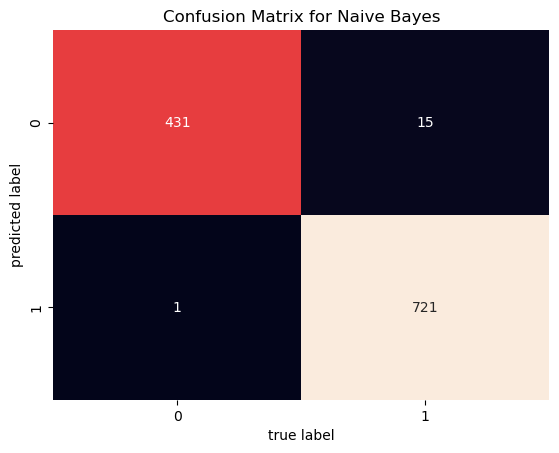

In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
predicted_naive_encoded = label_encoder.transform(predicted_naive)


# Compute confusion matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test_encoded, predicted_naive_encoded)

#mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()



In [65]:
from sklearn.metrics import classification_report

report = classification_report(y_test_encoded, predicted_naive_encoded)
print(report)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       432
           1       1.00      0.98      0.99       736

    accuracy                           0.99      1168
   macro avg       0.98      0.99      0.99      1168
weighted avg       0.99      0.99      0.99      1168

